In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import logging
import os

from data_handler import DataHandler

import alphatools as at
from alphatools.pl.figure import create_figure, label
from alphatools.pl.plots import Plots

logging.basicConfig(level=logging.INFO)
_is_pytest_run = os.environ.get("IS_PYTEST_RUN", "False").lower() == "true"

## Basic EDA on a 'real life' example dataset:

1. Download example data
2. Filter for data completeness on sample level
3. Visualize samples as histograms
4. Save data

In [ ]:
output_directory = "./example_outputs/03b_basic_workflow/"

### Generate an example dataset as an anndata.AnnData instance

In [ ]:
data_handler = DataHandler("domap", target_folder="HOME")

adata = data_handler.get_data("adata", truncate=_is_pytest_run)

df_metadata = data_handler.get_data("metadata")
adata = at.pp.add_metadata(adata, df_metadata.set_index("filename"), axis=0, keep_existing_metadata=_is_pytest_run)

print("The numeric data in the anndata object:")
display(adata.to_df().head())

print("The sample-level metadata in the anndata object:")
display(adata.obs.head())

print("The feature-level metadata in the anndata object:")
display(adata.var.head())

/Users/vincenthbrennsteiner/alphatools_test_data/precursors.tsv does not yet exist


KeyboardInterrupt: 

### Filter by data completeness:

Remove features which have more than the allowed fraction of missing values

In [ ]:
# filter out features with more than 25 % missing values
adata = at.pp.filter_data_completeness(
    adata=adata,
    max_missing=0.25,
    axis=1,
)

print("The numeric data in the anndata object:")
display(adata.to_df().head())

print("The sample-level metadata in the anndata object:")
display(adata.obs.head())

print("The feature-level metadata in the anndata object:")
display(adata.var.head())

NameError: name 'adata' is not defined

### Visualize the distribution of values in different levels of an observational metadata variable

In this example, check the distribution of expression values for a selected protein_id.

NameError: name 'adata' is not defined

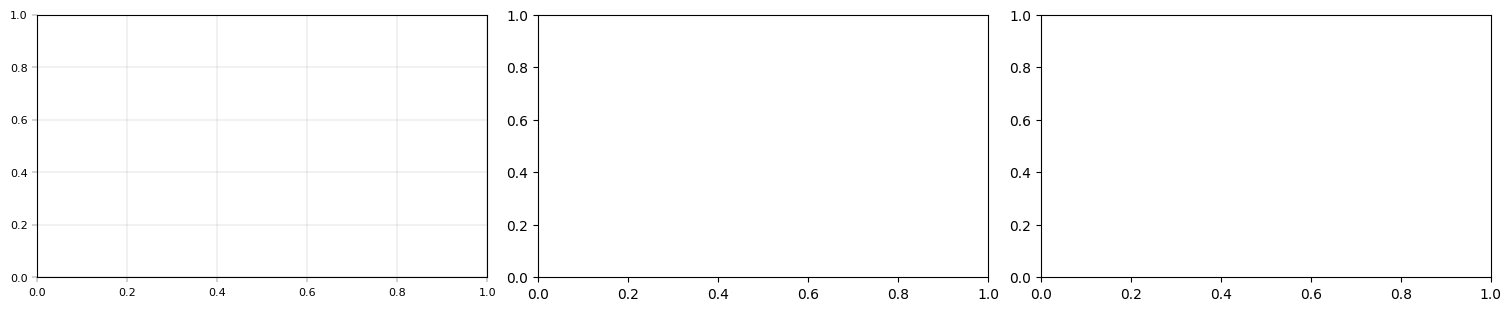

In [ ]:
# Apply the AxisManager to make axes iterable and apply consistent AlphaTools styling.
# Axes can also be accessed directly by indexing the axm object.

# create_figure now returns an AxisManager instance
fig, axm = create_figure(nrows=1, ncols=3, figsize=(15, 3))

common_params = {
    "bins": 20,
    "legend": "auto",
    "hist_kwargs": {"alpha": 0.5, "histtype": "stepfilled", "linewidth": 0.5, "edgecolor": "black"},
}

# axm = AxisManager(axs)

# Plot.histogram handles adata natively. Columns from the data and metadata are accessible
# Focus on the distribution of cell types in gene_1
ax = axm.next()

protein_id = "A6NMY6;P07355"
Plots.histogram(data=adata, value_column=protein_id, ax=ax, **common_params)
label(ax, protein_id, "Frequency", f"Distribution of {protein_id}")

# Focus on the distribution of cell types in gene_1
ax = axm.next()
color_column = "replicate"
Plots.histogram(data=adata, value_column=protein_id, color_column=color_column, ax=ax, **common_params)
label(ax, protein_id, "Frequency", f"Distribution of {protein_id} by {color_column}")

# Focus on the distribution of cell types in gene_1
ax = axm.next()
color_column = "fraction"
Plots.histogram(data=adata, value_column=protein_id, color_column=color_column, ax=ax, **common_params)
label(ax, protein_id, "Frequency", f"Distribution of {protein_id} by {color_column}")